# Step1: Import necessary libraries for training, preprocessing, exploratory analysis, metrics ...

In [207]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from warnings import filterwarnings
filterwarnings('ignore')

In [205]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.autoscale()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Step2: Import data into dataframe

In [167]:
train_features = pd.read_csv("./train/X_train.txt",header=None, delimiter=r"\s+")
test_features  = pd.read_csv("./test/X_test.txt",header=None, delimiter=r"\s+")

In [169]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [171]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [172]:
train_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [173]:
test_features.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,...,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,0.273996,-0.017863,-0.108386,-0.613635,-0.508330,-0.633797,-0.641278,-0.522676,-0.637038,-0.462063,...,0.130236,-0.277593,-0.598756,0.005264,0.003799,0.040029,-0.017298,-0.513923,0.074886,-0.048720
std,0.060570,0.025745,0.042747,0.412597,0.494269,0.362699,0.385199,0.479899,0.357753,0.523916,...,0.231018,0.317245,0.311042,0.336147,0.445077,0.634989,0.501311,0.509205,0.324300,0.241467
min,-0.592004,-0.362884,-0.576184,-0.999606,-1.000000,-0.998955,-0.999417,-0.999914,-0.998899,-0.952357,...,-0.785543,-1.000000,-1.000000,-1.000000,-0.993402,-0.998898,-0.991096,-0.984195,-0.913704,-0.949228
25%,0.262075,-0.024961,-0.121162,-0.990914,-0.973664,-0.976122,-0.992333,-0.974131,-0.975352,-0.934447,...,-0.008433,-0.517494,-0.829593,-0.130541,-0.282600,-0.518924,-0.428375,-0.829722,0.022140,-0.098485
50%,0.277113,-0.016967,-0.108458,-0.931214,-0.790972,-0.827534,-0.937664,-0.799907,-0.817005,-0.852659,...,0.142676,-0.311023,-0.683672,0.005188,0.006767,0.047113,-0.026726,-0.729648,0.181563,-0.010671
75%,0.288097,-0.010143,-0.097123,-0.267395,-0.105919,-0.311432,-0.321719,-0.133488,-0.322771,-0.009965,...,0.288320,-0.083559,-0.458332,0.146200,0.288113,0.622151,0.394387,-0.545939,0.260252,0.092373
max,0.671887,0.246106,0.494114,0.465299,1.000000,0.489703,0.439657,1.000000,0.427958,0.786436,...,1.000000,1.000000,1.000000,0.998898,0.986347,1.000000,1.000000,0.833180,1.000000,0.973113


In [174]:
train_labels=pd.read_csv("./train/y_train.txt",header=None)
train_labels.columns=['label']
test_labels=pd.read_csv("./test/y_test.txt",header=None)
test_labels.columns=['label']

In [175]:
train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
label    7352 non-null int64
dtypes: int64(1)
memory usage: 57.6 KB


In [176]:
test_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
label    2947 non-null int64
dtypes: int64(1)
memory usage: 23.1 KB


In [177]:
train_labels.describe()

,label
count,7352.000000
mean,3.643362
std,1.744802
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [178]:
test_labels.describe()

,label
count,2947.000000
mean,3.577876
std,1.740348
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,6.000000


In [179]:
activities=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

In [185]:
train_labels_copy = train_labels.copy()
train_labels_copy['label'] = train_labels_copy['label'].apply(lambda x: activities[x - 1])
test_labels_copy = test_labels.copy()
test_labels_copy['label'] = test_labels_copy['label'].apply(lambda x: activities[x - 1])

In [186]:
train_labels_copy['label'].value_counts()


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: label, dtype: int64

In [187]:
test_labels_copy['label'].value_counts()

LAYING                537
STANDING              532
WALKING               496
SITTING               491
WALKING_UPSTAIRS      471
WALKING_DOWNSTAIRS    420
Name: label, dtype: int64

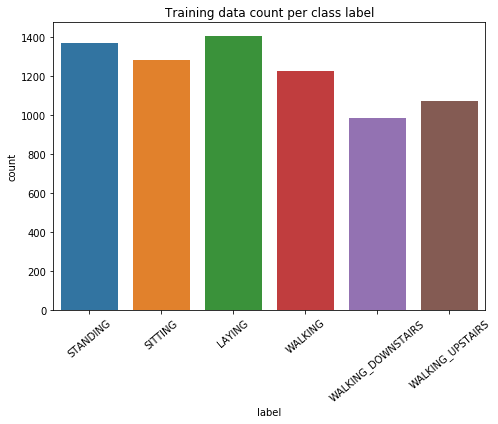

In [190]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
axis = sns.countplot(x='label',data=train_labels_copy,)
axis.set_xticklabels(axis.get_xticklabels(), rotation=40)
plt.title("Training data count per class label")
plt.show()

# Training models

# 1. Logistic Regression

In [95]:
#X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33, random_state=0)


In [197]:
lr_params = {'C':np.logspace(-1, 1, 10),
             'max_iter':[10,100]}
lr = LogisticRegression(solver='lbfgs')
gridcv_lr = GridSearchCV(lr, lr_params, verbose=1, cv=3)

In [208]:

gridcv_lr.fit(train_features,train_labels['label'].ravel())


Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   39.0s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([ 0.1       ,  0.16681005,  0.27825594,  0.46415888,  0.77426368,
        1.29154967,  2.15443469,  3.59381366,  5.9948425 , 10.        ]),
                         'max_iter': [10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [199]:
gridcv_lr.best_params_

{'C': 10.0, 'max_iter': 100}

In [200]:
lr_predictions = gridcv_lr.predict(test_features)

In [201]:
print(classification_report(test_labels,lr_predictions))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97       496
           2       0.98      0.95      0.96       471
           3       1.00      0.97      0.99       420
           4       0.98      0.87      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.97      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



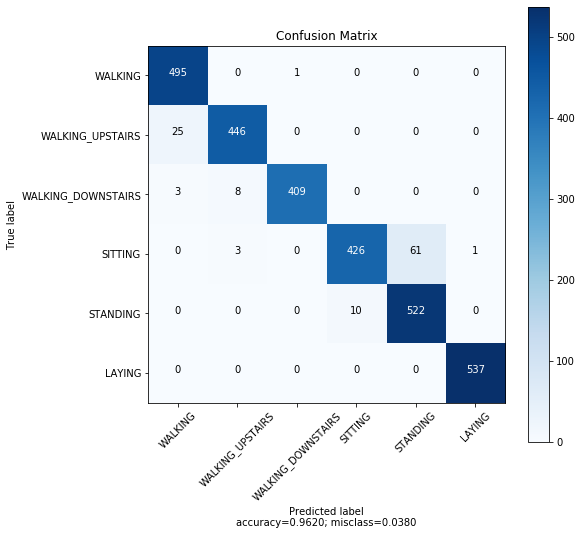

In [204]:
plot_confusion_matrix(confusion_matrix(test_labels,lr_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for logistic classifier")

# 2. KNN

In [215]:
knn_params = {'n_neighbors':np.array(range(9,18))}
knn = KNeighborsClassifier()
gridcv_knn = GridSearchCV(knn, knn_params, verbose=False, cv=3)

In [216]:

gridcv_knn.fit(train_features,train_labels['label'].ravel())



GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=False)

In [217]:
gridcv_knn.best_params_

{'n_neighbors': 17}

In [218]:
knn_predictions = gridcv_knn.predict(test_features)

In [220]:
print(classification_report(test_labels,knn_predictions))

              precision    recall  f1-score   support

           1       0.85      0.98      0.91       496
           2       0.89      0.91      0.90       471
           3       0.96      0.77      0.85       420
           4       0.93      0.80      0.86       491
           5       0.84      0.94      0.89       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.90      0.90      2947
weighted avg       0.91      0.91      0.90      2947



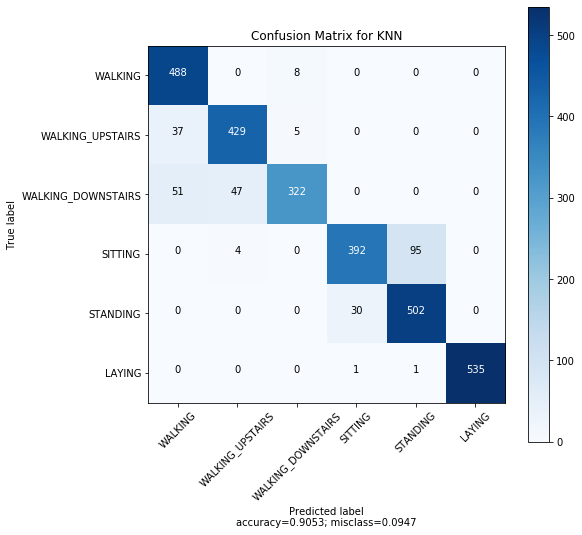

In [221]:
plot_confusion_matrix(confusion_matrix(test_labels,knn_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for KNN")

# 3.Random Forest

In [222]:
rf_params = {'n_estimators' : np.arange(10,30,10),'max_depth' : np.arange(1,6,2)}
rf = RandomForestClassifier(random_state=0)
gridcv_rf = GridSearchCV(rf, rf_params, verbose=False, cv=3)


In [223]:
gridcv_rf.fit(train_features,train_labels['label'].ravel())

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [224]:
gridcv_rf.best_params_

{'max_depth': 5, 'n_estimators': 20}

In [225]:
rf_predictions = gridcv_rf.predict(test_features)

In [226]:
print(classification_report(test_labels,rf_predictions))

              precision    recall  f1-score   support

           1       0.80      0.96      0.88       496
           2       0.90      0.89      0.90       471
           3       0.93      0.73      0.82       420
           4       0.93      0.79      0.85       491
           5       0.83      0.94      0.88       532
           6       1.00      1.00      1.00       537

    accuracy                           0.89      2947
   macro avg       0.90      0.89      0.89      2947
weighted avg       0.90      0.89      0.89      2947



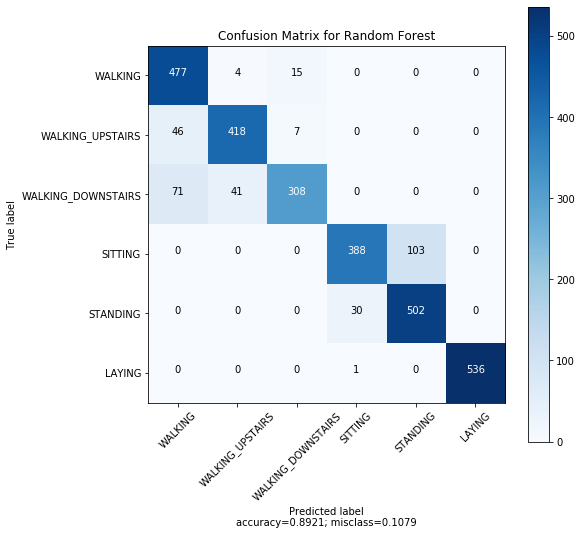

In [227]:
plot_confusion_matrix(confusion_matrix(test_labels,rf_predictions),
                      normalize    = False,
                      target_names = activities,
                      title        = "Confusion Matrix for Random Forest")

# 4. Final result

In [236]:
knn_res = [gridcv_knn.score(train_features,train_labels),
           gridcv_knn.score(test_features,test_labels),
           precision_score(test_labels,knn_predictions,average ='weighted'),
           recall_score(test_labels,knn_predictions,average ='weighted'),
           f1_score(test_labels,knn_predictions,average ='weighted')]


In [265]:
result = pd.DataFrame(np.array(knn_res).reshape(-1,5))

In [266]:
lr_res = [gridcv_lr.score(train_features,train_labels),
         gridcv_lr.score(test_features,test_labels),
         precision_score(test_labels,lr_predictions,average ='weighted'),
         recall_score(test_labels,lr_predictions,average ='weighted'),
         f1_score(test_labels,lr_predictions,average ='weighted')]
lr_res = pd.DataFrame(np.array(lr_res).reshape(-1,5))

In [267]:
result = pd.concat([result,lr_res])

In [268]:
rf_res = [gridcv_rf.score(train_features,train_labels),
       gridcv_rf.score(test_features,test_labels),
       precision_score(test_labels,rf_predictions,average ='weighted'),
       recall_score(test_labels,rf_predictions,average ='weighted'),
       f1_score(test_labels,rf_predictions,average ='weighted')]
rf_res = pd.DataFrame(np.array(rf_res).reshape(-1,5))

In [269]:
result = pd.concat([result,rf_res])

In [270]:
lab=['Train Accuracy','Test Accuracy','Precision','Recall','F1 score']
models =['KNN','Logistic Regression','Random Forest']
idx=[1,2,3]
result.index = [idx,models]
result.columns=lab

In [271]:
result

,,Train Accuracy,Test Accuracy,Precision,Recall,F1 score
1,KNN,0.967492,0.905327,0.910584,0.905327,0.904179
2,Logistic Regression,0.994423,0.961995,0.963746,0.961995,0.961805
3,Random Forest,0.937296,0.892094,0.898754,0.892094,0.890947
